In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown
import seaborn as sns
from mod.unique_value import checking_unique_value

# Annual Surface Temperature Change

## Import Data

In [5]:
annual_surface_temperature_change_df = pd.read_csv('./Annual_Surface_Temperature_Change.csv')
annual_surface_temperature_change_df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


## Check Data

In [6]:
annual_surface_temperature_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             225 non-null    int64  
 1   Country              225 non-null    object 
 2   ISO2                 223 non-null    object 
 3   ISO3                 225 non-null    object 
 4   Indicator            225 non-null    object 
 5   Unit                 225 non-null    object 
 6   Source               225 non-null    object 
 7   CTS_Code             225 non-null    object 
 8   CTS_Name             225 non-null    object 
 9   CTS_Full_Descriptor  225 non-null    object 
 10  F1961                188 non-null    float64
 11  F1962                189 non-null    float64
 12  F1963                188 non-null    float64
 13  F1964                188 non-null    float64
 14  F1965                188 non-null    float64
 15  F1966                192 non-null    flo

In [7]:
annual_surface_temperature_change_df.describe().round(2)

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,225.0,188.00,189.00,188.00,188.00,188.00,192.00,191.00,191.00,190.00,...,216.00,216.00,216.00,213.00,214.00,213.00,213.00,212.00,213.00,213.00
mean,113.0,0.16,-0.01,-0.01,-0.07,-0.25,0.11,-0.11,-0.20,0.16,...,0.93,1.11,1.27,1.44,1.28,1.30,1.44,1.55,1.34,1.38
std,65.1,0.41,0.34,0.39,0.31,0.27,0.38,0.34,0.27,0.31,...,0.32,0.56,0.46,0.40,0.39,0.60,0.47,0.62,0.48,0.67
min,1.0,-0.69,-0.91,-1.27,-0.88,-1.06,-1.80,-1.05,-1.63,-0.90,...,0.12,-0.09,-0.43,0.25,0.02,0.24,0.05,0.23,-0.42,-1.30
25%,57.0,-0.10,-0.16,-0.21,-0.24,-0.39,-0.04,-0.26,-0.34,-0.01,...,0.74,0.74,1.02,1.15,1.03,0.86,1.17,1.16,1.02,0.88
50%,113.0,0.06,-0.06,-0.00,-0.06,-0.23,0.10,-0.15,-0.19,0.20,...,0.90,0.99,1.22,1.45,1.28,1.12,1.41,1.48,1.33,1.32
75%,169.0,0.32,0.11,0.23,0.13,-0.09,0.28,0.02,-0.07,0.35,...,1.19,1.34,1.52,1.71,1.54,1.83,1.70,1.83,1.63,1.92
max,225.0,1.89,1.00,1.20,1.10,0.86,1.15,1.13,0.48,0.94,...,1.64,2.70,2.61,2.46,2.49,2.77,2.69,3.69,2.68,3.24


It seems that we have several empty cells (null or blank)

## Identify Unique Values

In [8]:
checking_unique_value(annual_surface_temperature_change_df)

Unique values in column 'ObjectId': 225
Unique values in column 'Country': 225
Unique values in column 'ISO2': 223
Unique values in column 'ISO3': 225
Unique values in column 'Indicator': 1
Unique values in column 'Unit': 1
Unique values in column 'Source': 1
Unique values in column 'CTS_Code': 1
Unique values in column 'CTS_Name': 1
Unique values in column 'CTS_Full_Descriptor': 1
Unique values in column 'F1961': 173
Unique values in column 'F1962': 169
Unique values in column 'F1963': 167
Unique values in column 'F1964': 167
Unique values in column 'F1965': 167
Unique values in column 'F1966': 171
Unique values in column 'F1967': 160
Unique values in column 'F1968': 168
Unique values in column 'F1969': 169
Unique values in column 'F1970': 168
Unique values in column 'F1971': 163
Unique values in column 'F1972': 167
Unique values in column 'F1973': 176
Unique values in column 'F1974': 168
Unique values in column 'F1975': 165
Unique values in column 'F1976': 171
Unique values in column

In [126]:
columns_to_drop = ['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor']

year_df = annual_surface_temperature_change_df.drop(columns=columns_to_drop, axis='columns')

numerical_features = annual_surface_temperature_change_df.select_dtypes(include = ['int64','float64']).columns.values
year_features = np.delete(list(numerical_features), 0)
year_features

array(['F1961', 'F1962', 'F1963', 'F1964', 'F1965', 'F1966', 'F1967',
       'F1968', 'F1969', 'F1970', 'F1971', 'F1972', 'F1973', 'F1974',
       'F1975', 'F1976', 'F1977', 'F1978', 'F1979', 'F1980', 'F1981',
       'F1982', 'F1983', 'F1984', 'F1985', 'F1986', 'F1987', 'F1988',
       'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994', 'F1995',
       'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009',
       'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016',
       'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022'], dtype='<U8')

## Identify Missing Values

In [40]:
blank_counts = annual_surface_temperature_change_df.isnull().sum()
blank_counts.sum()
#sorted(blank_counts)

1492

## Missing Values Percent

In [46]:
percent_missing = annual_surface_temperature_change_df.isnull().sum() * 100 / len(annual_surface_temperature_change_df)
sorted(percent_missing)
#percent_missing = percent_missing.sort_values(ascending=False,inplace=True)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8888888888888888,
 3.5555555555555554,
 3.5555555555555554,
 4.0,
 4.0,
 4.0,
 4.444444444444445,
 4.444444444444445,
 4.444444444444445,
 4.888888888888889,
 4.888888888888889,
 5.333333333333333,
 5.333333333333333,
 5.333333333333333,
 5.333333333333333,
 5.333333333333333,
 5.333333333333333,
 5.777777777777778,
 5.777777777777778,
 5.777777777777778,
 5.777777777777778,
 5.777777777777778,
 6.666666666666667,
 6.666666666666667,
 6.666666666666667,
 7.111111111111111,
 7.111111111111111,
 7.111111111111111,
 7.555555555555555,
 7.555555555555555,
 7.555555555555555,
 8.0,
 14.222222222222221,
 14.666666666666666,
 14.666666666666666,
 14.666666666666666,
 14.666666666666666,
 15.11111111111111,
 15.11111111111111,
 15.11111111111111,
 15.11111111111111,
 15.11111111111111,
 15.555555555555555,
 15.555555555555555,
 15.555555555555555,
 15.555555555555555,
 15.555555555555555,
 15.555555555555555,
 16.0,
 16.0,
 16.0,
 16.0,


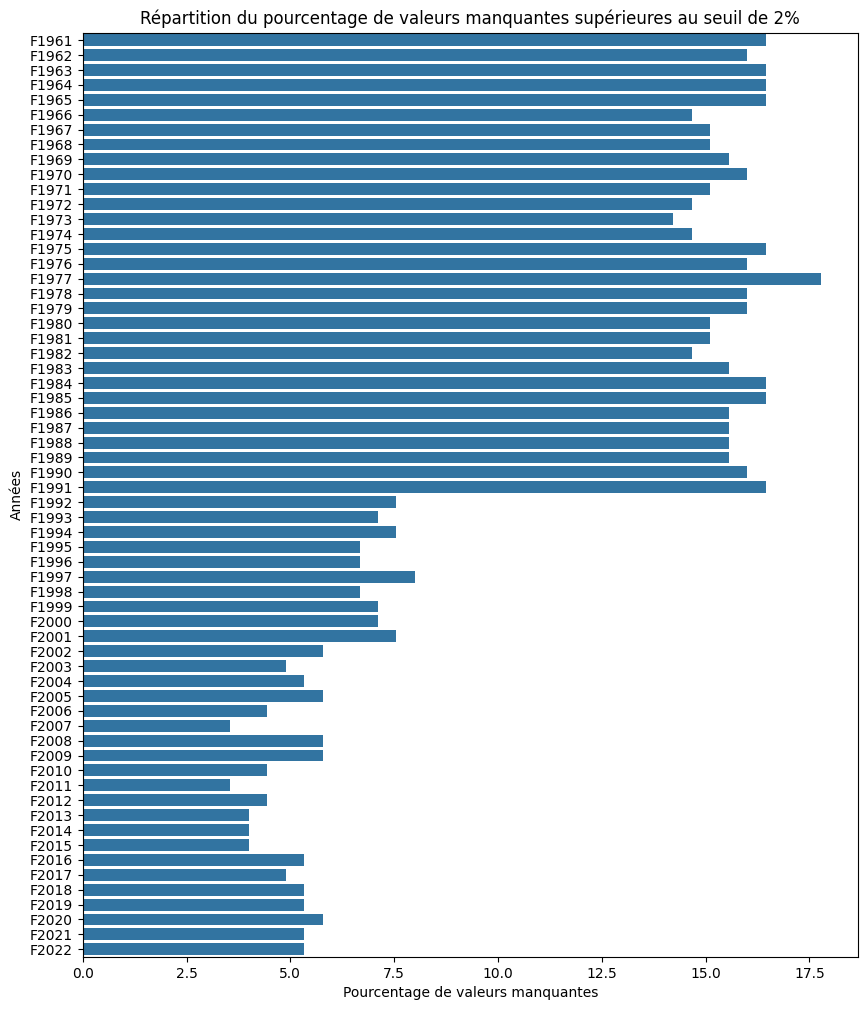

In [59]:
threshold_view = 2

filtered = percent_missing[percent_missing.values > threshold_view]
plt.figure(figsize=(10, 12)) 
ax = sns.barplot(x = filtered, y = filtered.index, orient='h');
ax.set_title(f"Répartition du pourcentage de valeurs manquantes "
             f"supérieures au seuil de {threshold_view}%");
ax.set_xlabel("Pourcentage de valeurs manquantes")
ax.set_ylabel("Années")

plt.show()

In [142]:
year_means = year_df.mean()
year_df.fillna(year_means, inplace=True)
year_df.isna().sum().sum()

0

In [144]:
country = annual_surface_temperature_change_df['Country']

In [145]:
year_df

,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,...,1.281000,0.456000,1.093000,1.555000,1.540000,1.544000,0.910000,0.498000,1.327000,2.012000
1,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.333000,1.198000,1.569000,1.464000,1.121000,2.028000,1.675000,1.498000,1.536000,1.518000
2,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.192000,1.690000,1.121000,1.757000,1.512000,1.210000,1.115000,1.926000,2.330000,1.688000
3,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,1.257000,1.170000,1.009000,1.539000,1.435000,1.189000,1.539000,1.430000,1.268000,1.256000
4,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,...,0.831000,1.946000,1.690000,1.990000,1.925000,1.919000,1.964000,2.562000,1.533000,3.243000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.632,0.576,0.333,0.819,-0.337,0.284,-0.026,-0.368,0.383,0.543,...,1.423000,1.401000,1.510000,1.732000,2.204000,0.942000,1.477000,2.069000,1.593000,1.970000
221,0.211,0.038,0.168,-0.246,-0.223,0.201,-0.117,-0.126,-0.092,0.150,...,1.016000,1.053000,1.412000,1.660000,1.429000,1.290000,1.444000,1.711000,1.447000,1.394000
222,0.029,-0.009,0.169,-0.251,-0.623,0.089,-0.257,-0.252,0.262,0.387,...,0.931199,1.114815,1.269773,1.439521,1.280785,1.302113,1.443061,1.552038,1.343531,1.382113
223,0.228,-0.168,-0.390,-0.279,-0.418,0.300,-0.014,-0.130,0.243,0.351,...,0.790000,0.917000,1.450000,1.401000,0.105000,0.648000,0.855000,0.891000,0.822000,0.686000


In [146]:
country_year_df = pd.concat([country, year_df], axis=1)
country_year_df = country_year_df.set_index('Country')[year_features]
country_year_df

,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
Country,,,,,,,,,,,,,,,,,,,,,
"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,...,1.281000,0.456000,1.093000,1.555000,1.540000,1.544000,0.910000,0.498000,1.327000,2.012000
Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.333000,1.198000,1.569000,1.464000,1.121000,2.028000,1.675000,1.498000,1.536000,1.518000
Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.192000,1.690000,1.121000,1.757000,1.512000,1.210000,1.115000,1.926000,2.330000,1.688000
American Samoa,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,1.257000,1.170000,1.009000,1.539000,1.435000,1.189000,1.539000,1.430000,1.268000,1.256000
"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,...,0.831000,1.946000,1.690000,1.990000,1.925000,1.919000,1.964000,2.562000,1.533000,3.243000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,0.632,0.576,0.333,0.819,-0.337,0.284,-0.026,-0.368,0.383,0.543,...,1.423000,1.401000,1.510000,1.732000,2.204000,0.942000,1.477000,2.069000,1.593000,1.970000
World,0.211,0.038,0.168,-0.246,-0.223,0.201,-0.117,-0.126,-0.092,0.150,...,1.016000,1.053000,1.412000,1.660000,1.429000,1.290000,1.444000,1.711000,1.447000,1.394000
"Yemen, Rep. of",0.029,-0.009,0.169,-0.251,-0.623,0.089,-0.257,-0.252,0.262,0.387,...,0.931199,1.114815,1.269773,1.439521,1.280785,1.302113,1.443061,1.552038,1.343531,1.382113


## Create a plot to see the evolution of the Annual Surface Temperature Change (ASTC) over the globe.

First, we filter ou dataframe and retrieve each year.

In [189]:
def update_plot(country):
    plt.figure(figsize=(10, 6))
    plt.plot(country_year_df.index, country_year_df[country])
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(f'Value by Year for {country}')
    plt.xticks(rotation=90)  # Rotate x-axis labels vertically
    plt.show()

In [190]:
#To a better understanding and display of the dataframe we transpose rows and columns
annual_surface_temperature_change_df_subset_transformed = annual_surface_temperature_change_df_subset.T

#We calculate the mean of the ASTC
mean_per_year = country_year_df.mean(axis=1)

In [191]:
# Dropdown widget for selecting country
country_dropdown = Dropdown(options=country_year_df.columns, description='Country')

# Interact function to update plot based on selected country
interact(update_plot, country=country_dropdown)

interactive(children=(Dropdown(description='Country', options=('Afghanistan, Islamic Rep. of', 'Albania', 'Alg…

<function __main__.update_plot(country)>

We create a plot 

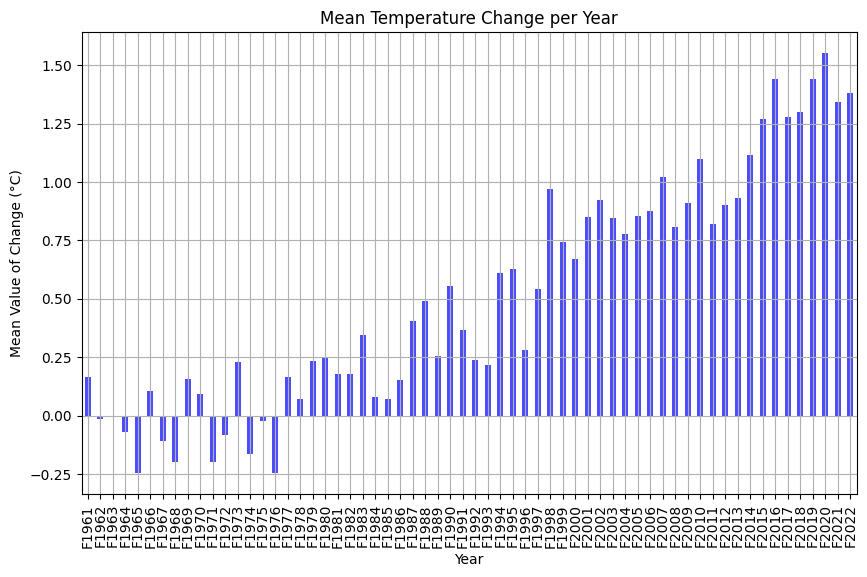

In [193]:
mean_per_year.plot(kind='bar', figsize=(10, 6), color='blue', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Mean Value of Change (°C)')
plt.title('Mean Temperature Change per Year')
plt.grid(True)
plt.show()

This indicator presents the mean surface temperature change during the period 1961-2021, using temperatures between 1951 and 1980 as a baseline.